# Project: Mapping the State-Space of Stem Cell "Decisions"

### 1. Background : Stem Cell Differentiation
In biology, every cell in your body contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they are "executing" different parts of that code. However, in order to reach their fates ('final' cell type), cells undergo a journey, the so called **cell differenciation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy: imagine a ball rolling down a hilly terrain. At the top (0h), the ball can go down many different valleys. By the bottom (168h), the ball is stuck in one specific path.

![alt text](waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf, "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [56]:
import pandas as pd

# Load dataset
df = pd.read_csv("gene_expression_data.csv")

# Preview first rows
print("HEAD:")
print(df.head())

# Dataset structure
print("\nINFO:")
print(df.info())

# Summary statistics
print("\nDESCRIBE:")
print(df.describe())


HEAD:
          Sample  Time Type       Actb      Bmi1       Bmp4  Bmp7     Bmpr1a  \
0  E14tg2a.0h.1A     0  E14  16.716759   0.00000  26.183448   0.0  25.493528   
1  E14tg2a.0h.1B     0  E14  11.283763   0.00000  15.379562   0.0  18.535507   
2  E14tg2a.0h.1C     0  E14  11.356264   0.00000  15.305810   0.0   0.000000   
3  E14tg2a.0h.1D     0  E14  10.923010  18.05053  16.744032   0.0  17.100323   
4  E14tg2a.0h.1E     0  E14  10.334779  18.60766  16.693236   0.0  17.364452   

   Cd34       Cdh1  ...      Trp53      Tubb3       Utf1        Vim  \
0   0.0  25.754394  ...  22.225853  25.431561  22.266882  21.747678   
1   0.0   0.000000  ...  13.895273  13.837472  16.676966  12.199917   
2   0.0   0.000000  ...  14.426960  15.933678  19.744670  11.956928   
3   0.0   0.000000  ...  14.508559  13.673305  16.911726  11.703409   
4   0.0   0.000000  ...  13.763772  12.942459  16.411662  11.049555   

        Wdr5      Wnt3a  Wnt5a     Zfp281      Zfp42  Unnamed: 99  
0  22.577380   0.0

### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

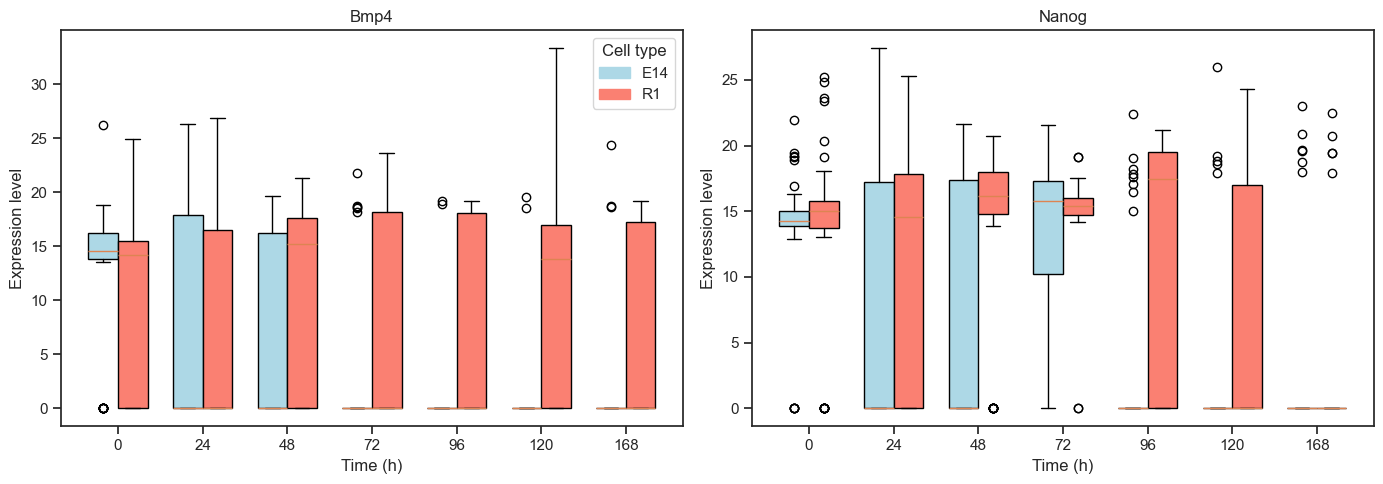

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv("gene_expression_data.csv")

genes = ["Bmp4", "Nanog"]

df = df.sort_values("Time")

time_points = sorted(df["Time"].unique())
cell_types = sorted(df["Type"].unique())

colors = {
    "E14": "lightblue",
    "R1": "salmon"
}
# plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, gene in zip(axes, genes):

    positions = range(len(time_points))
    width = 0.35

    for i, cell in enumerate(cell_types):
        subset = df[df["Type"] == cell]

        data = [
            subset[subset["Time"] == t][gene].dropna().values
            for t in time_points
        ]

        offset = (-width/2 if i == 0 else width/2)
        pos = [p + offset for p in positions]

        bp = ax.boxplot(
            data,
            positions=pos,
            widths=width,
            patch_artist=True
        )

        # color each box
        for box in bp["boxes"]:
            box.set_facecolor(colors[cell])

    ax.set_xticks(positions)
    ax.set_xticklabels(time_points)
    ax.set_xlabel("Time (h)")
    ax.set_ylabel("Expression level")
    ax.set_title(gene)

# legend
legend_handles = [
    mpatches.Patch(color=colors[cell], label=cell)
    for cell in cell_types
]
axes[0].legend(handles=legend_handles, title="Cell type")

plt.tight_layout()
plt.show()


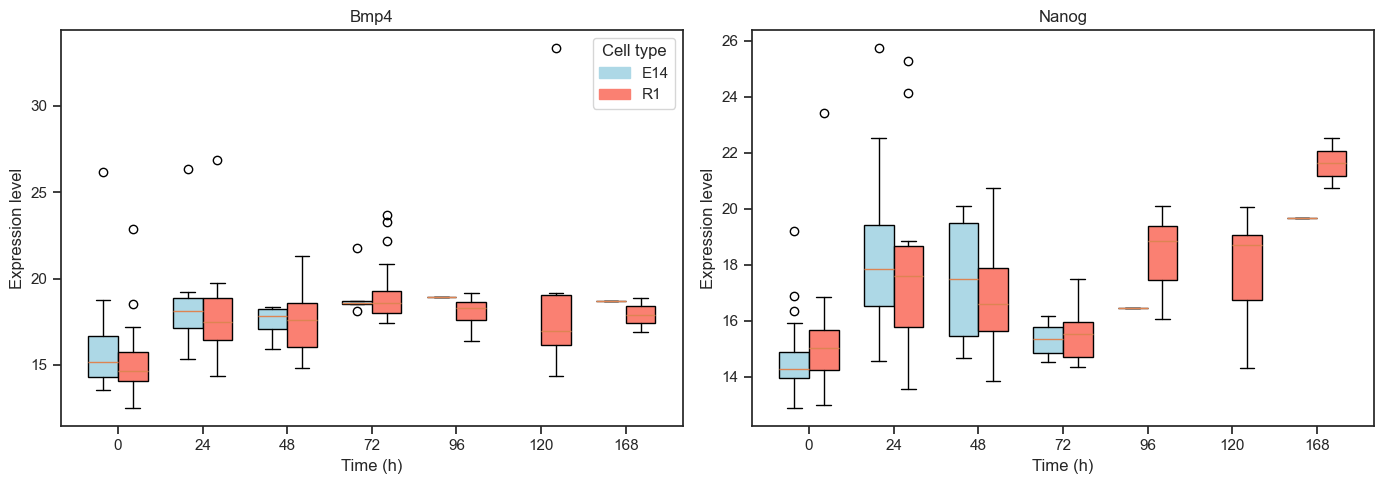

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#reload dataset
df = pd.read_csv("gene_expression_data.csv")

genes = ["Bmp4", "Nanog"]

df = df.sort_values("Time")

time_points = sorted(df["Time"].unique())
cell_types = sorted(df["Type"].unique())

colors = {
    "E14": "lightblue",
    "R1": "salmon"
}


# plot

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, gene in zip(axes, genes):

    positions = range(len(time_points))
    width = 0.35

    for i, cell in enumerate(cell_types):
        df = df[~((df[genes] == 0).any(axis=1))]
        subset = df[df["Type"] == cell]

        data = [
            subset[(subset["Time"] == t) & (subset[gene] != 0)][gene]
                .dropna()
                .values
            for t in time_points
        ]

        offset = (-width/2 if i == 0 else width/2)
        pos = [p + offset for p in positions]

        bp = ax.boxplot(
            data,
            positions=pos,
            widths=width,
            patch_artist=True
        )

        # color each box
        for box in bp["boxes"]:
            box.set_facecolor(colors[cell])

    ax.set_xticks(positions)
    ax.set_xticklabels(time_points)
    ax.set_xlabel("Time (h)")
    ax.set_ylabel("Expression level")
    ax.set_title(gene)

# legend
legend_handles = [
    mpatches.Patch(color=colors[cell], label=cell)
    for cell in cell_types
]
axes[0].legend(handles=legend_handles, title="Cell type")

plt.tight_layout()
plt.show()


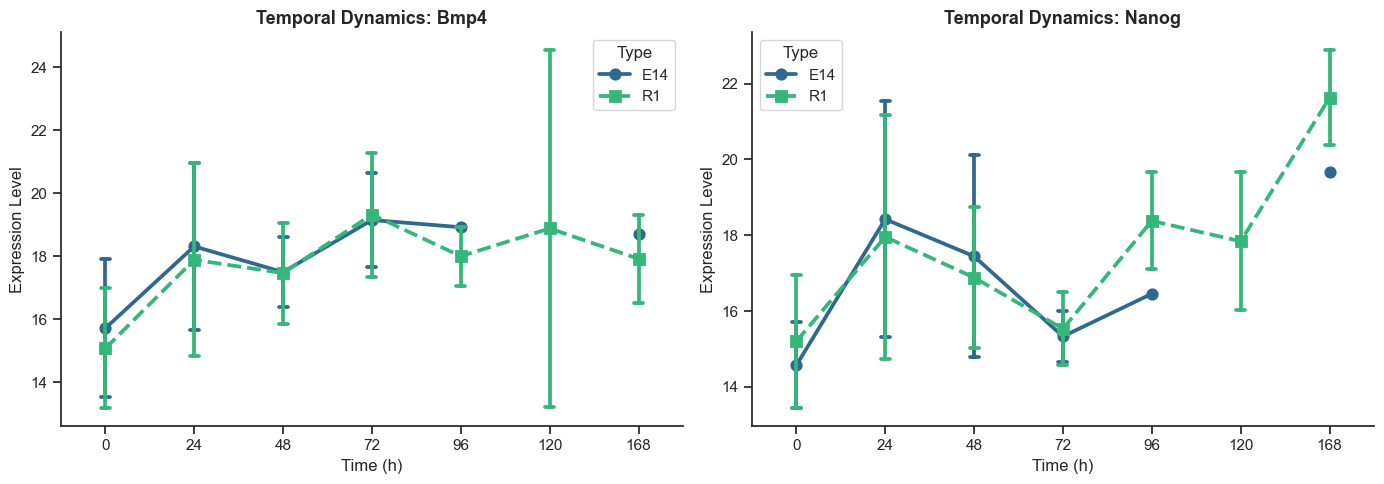

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("gene_expression_data.csv")
df = df.sort_values("Time")
df = df[~((df[genes] == 0).any(axis=1))]  # Remove rows with any zero gene values


sns.set_theme(style="ticks")
genes = ["Bmp4", "Nanog"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, gene in enumerate(genes):
    sns.pointplot(
        data=df, x="Time", y=gene, hue="Type", 
        ax=axes[i], palette="viridis", 
        capsize=.1, errorbar="sd", markers=["o", "s"], linestyles=["-", "--"]
    )
    
    axes[i].set_title(f"Temporal Dynamics: {gene}", fontsize=13, fontweight='bold')
    axes[i].set_xlabel("Time (h)")
    axes[i].set_ylabel("Expression Level")
    
    # Clean up the spines (border) for a modern look
    sns.despine(ax=axes[i])

plt.tight_layout()
plt.show()

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

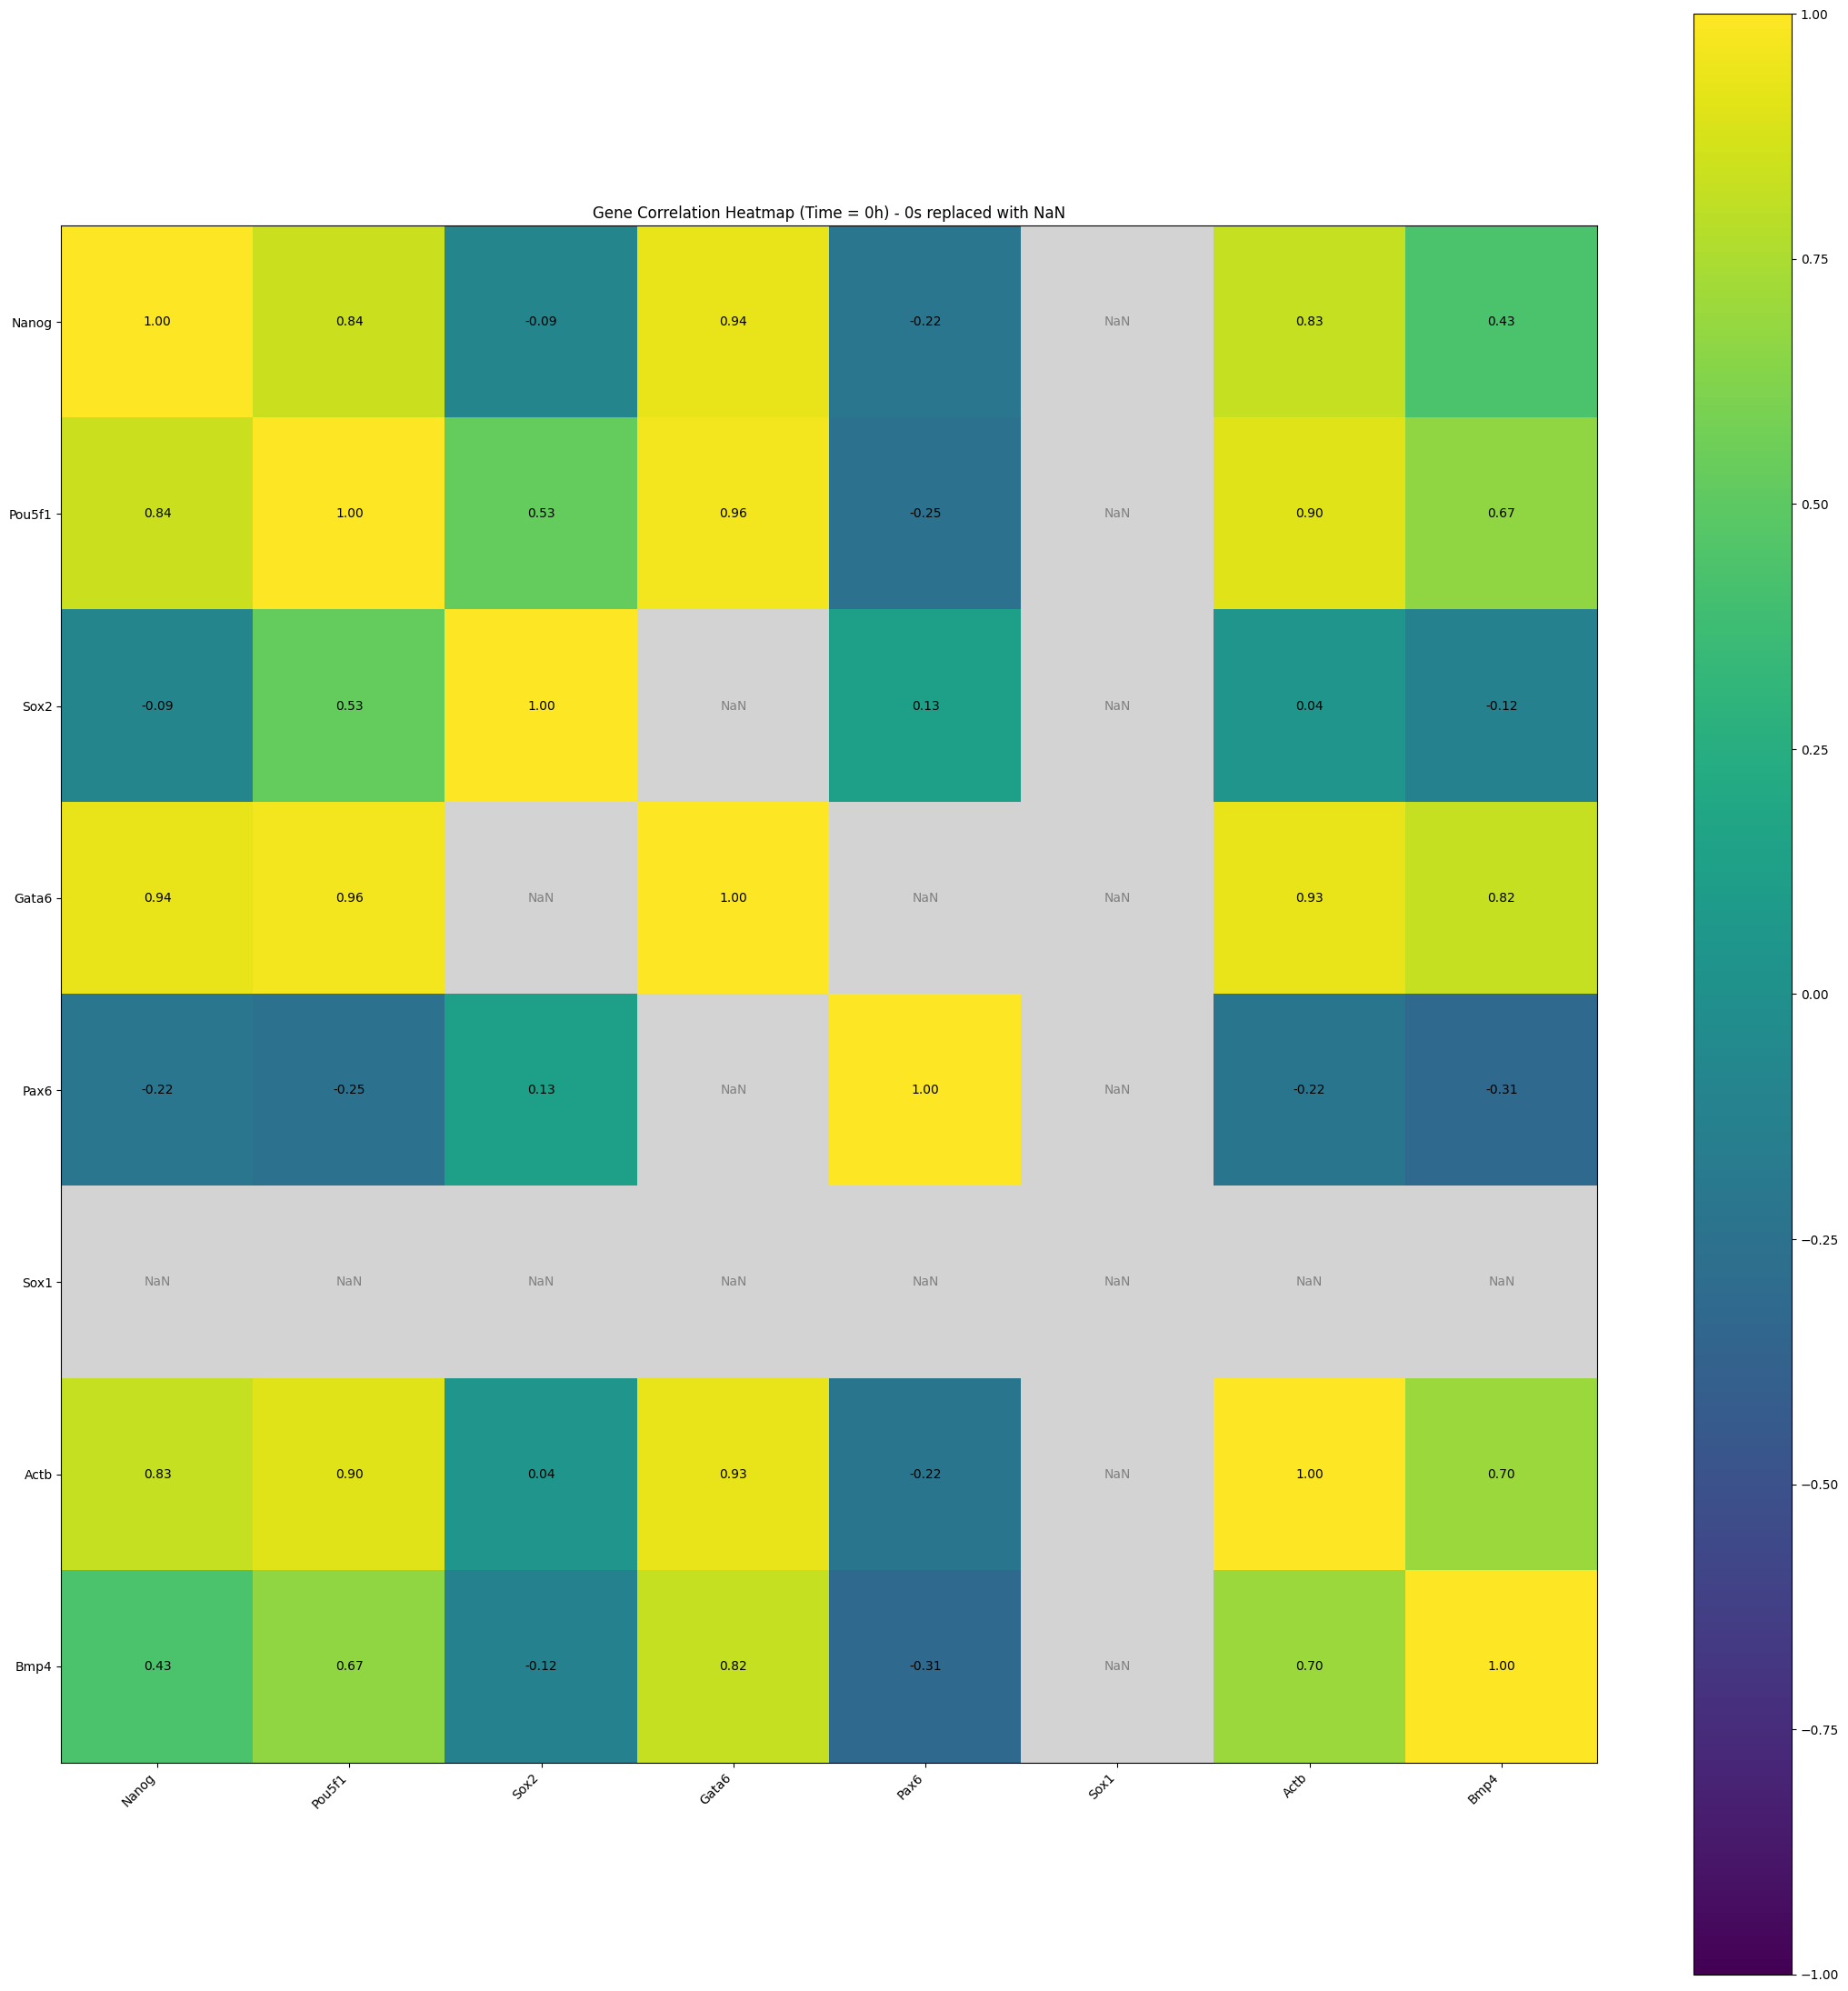

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("gene_expression_data.csv")
genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4']


df_t0 = df[df["Time"] == 0][genes]
df_t0 = df_t0.replace(0, np.nan)
corr = df_t0.corr()
fig, ax = plt.subplots(figsize=(22, 22))

cmap = plt.cm.viridis.copy()
cmap.set_bad('lightgray')  # Set color for NaN values

im = ax.imshow(corr.values, cmap=cmap, vmin=-1, vmax=1)

# Ticks and labels
ax.set_xticks(np.arange(len(genes)))
ax.set_yticks(np.arange(len(genes)))
ax.set_xticklabels(genes, rotation=45, ha="right")
ax.set_yticklabels(genes)

# Colorbar
plt.colorbar(im, ax=ax)

# Annotate correlation values (skip if NaN)
for i in range(len(genes)):
    for j in range(len(genes)):
        val = corr.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.2f}", ha="center", va="center")
        else:
            ax.text(j, i, "NaN", ha="center", va="center", color='gray')

ax.set_title("Gene Correlation Heatmap (Time = 0h) - 0s replaced with NaN")

plt.tight_layout()
plt.show()

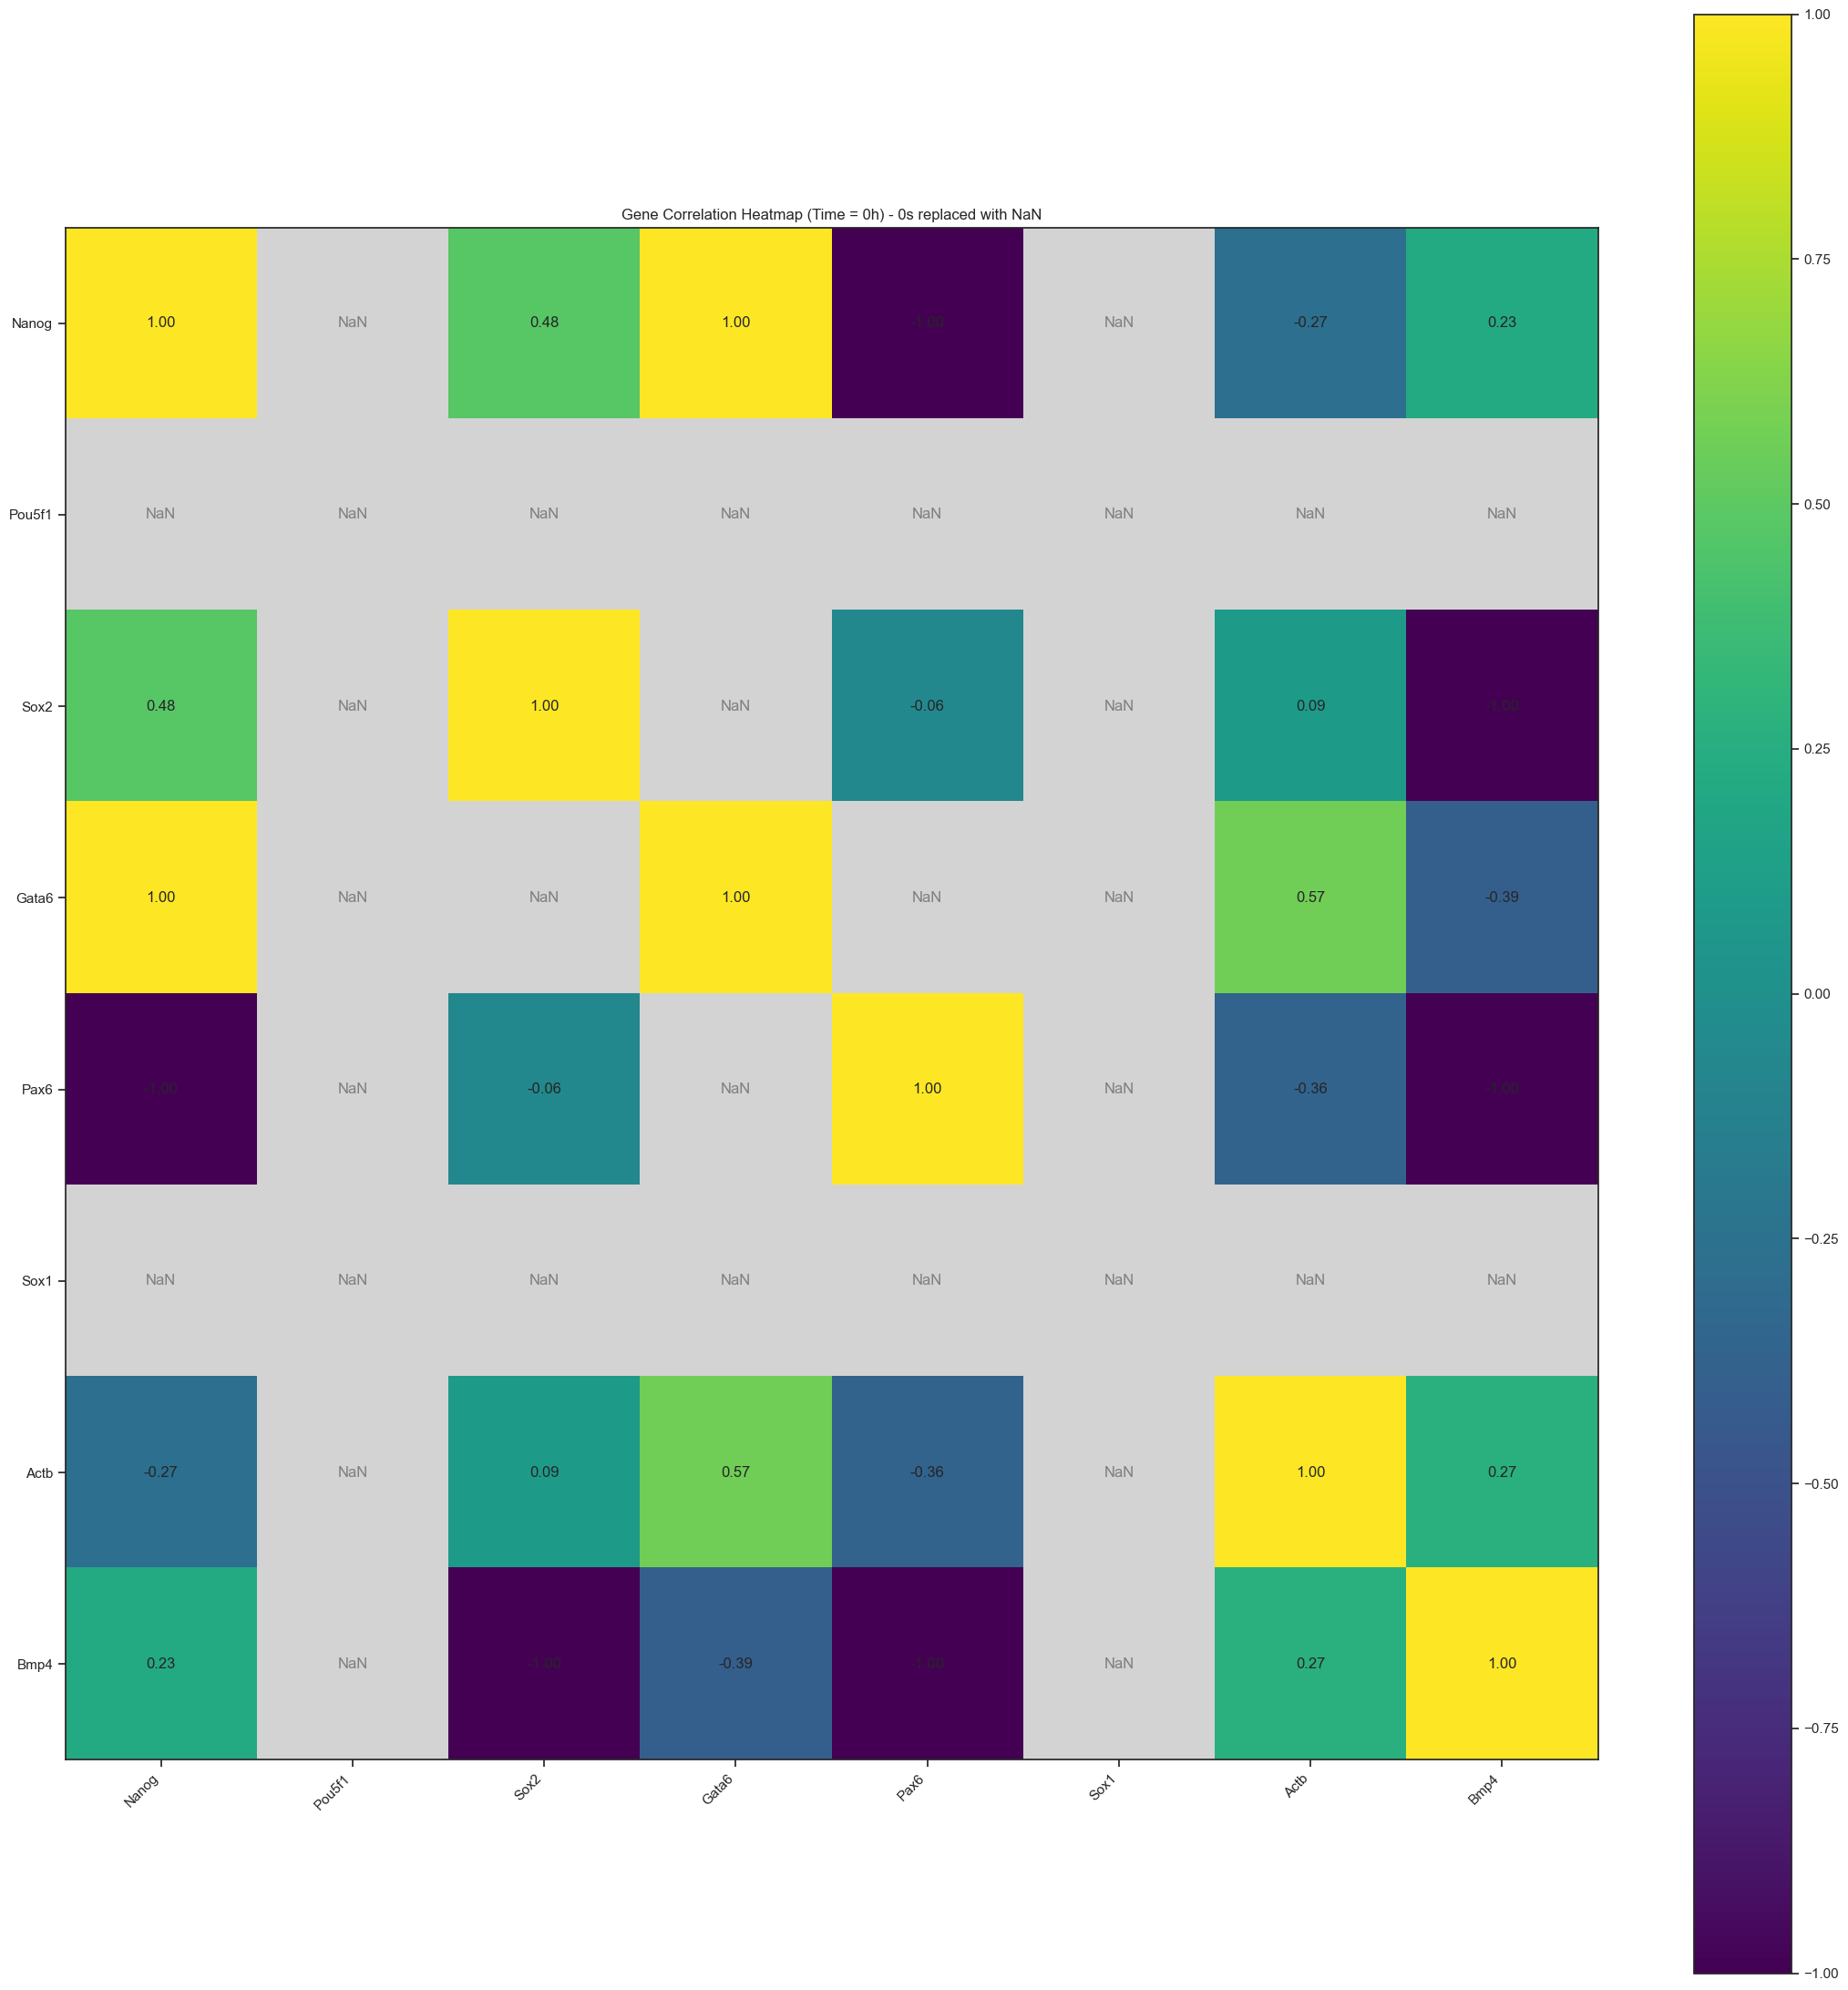

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("gene_expression_data.csv")
genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4']


df_t_end = df[df["Time"] == 168][genes]
df_t_end = df_t_end.replace(0, np.nan)
corr = df_t_end.corr()
fig, ax = plt.subplots(figsize=(22, 22))

cmap = plt.cm.viridis.copy()
cmap.set_bad('lightgray')  # Set color for NaN values

im = ax.imshow(corr.values, cmap=cmap, vmin=-1, vmax=1)

# Ticks and labels
ax.set_xticks(np.arange(len(genes)))
ax.set_yticks(np.arange(len(genes)))
ax.set_xticklabels(genes, rotation=45, ha="right")
ax.set_yticklabels(genes)

# Colorbar
plt.colorbar(im, ax=ax)

# Annotate correlation values (skip if NaN)
for i in range(len(genes)):
    for j in range(len(genes)):
        val = corr.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.2f}", ha="center", va="center")
        else:
            ax.text(j, i, "NaN", ha="center", va="center", color='gray')

ax.set_title("Gene Correlation Heatmap (Time = 0h) - 0s replaced with NaN")

plt.tight_layout()
plt.show()

/var/folders/69/2cc632vs6ss5k6xfk3cps1kw0000gn/T/ipykernel_32583/2727016599.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_t0[df["Time"] == 0]


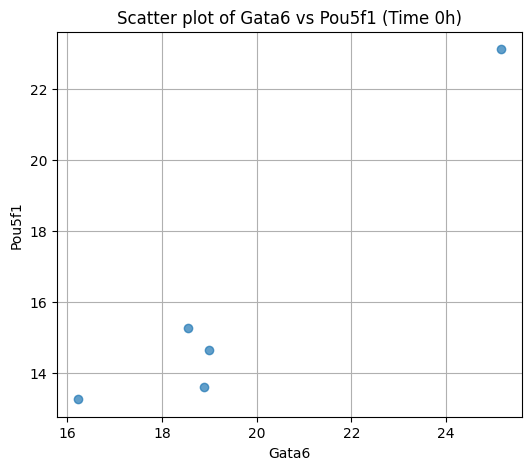

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



gene_x = 'Gata6' 
gene_y = 'Pou5f1'

df_plot = df_t0[df["Time"] == 0]

plt.figure(figsize=(6,5))
plt.scatter(df_t0[gene_x], df_t0[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time 0h)")
plt.grid(True)
plt.show()



/var/folders/69/2cc632vs6ss5k6xfk3cps1kw0000gn/T/ipykernel_30750/2260556477.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_t0[df["Time"] == 0]


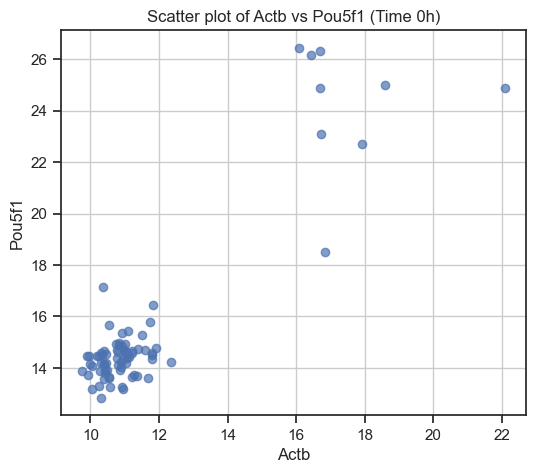

Genes with highest correlation at time 0: Actb and Pou5f1
Correlation at 168h: 0.02


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



gene_x = 'Actb' 
gene_y = 'Pou5f1'

df_plot = df_t0[df["Time"] == 0]

plt.figure(figsize=(6,5))
plt.scatter(df_t0[gene_x], df_t0[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time 0h)")
plt.grid(True)
plt.show()


# correlation at time 168
df_t_end = df[df["Time"] == 168][[gene_x, gene_y]]
corr_t168 = df_t_end.corr().iloc[0,1]

print(f"Genes with highest correlation at time 0: {gene_x} and {gene_y}")
print(f"Correlation at 168h: {corr_t168:.2f}")


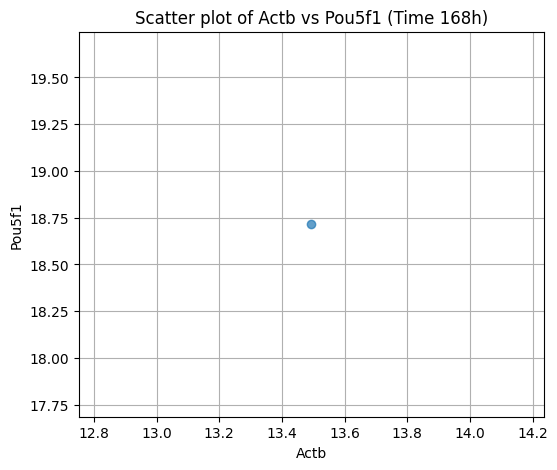

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



gene_x = 'Actb' 
gene_y = 'Pou5f1'
time = 168
df_t168 = df[df["Time"] == 168][[gene_x, gene_y]].replace(0, np.nan)

plt.figure(figsize=(6,5))
plt.scatter(df_t168[gene_x], df_t168[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time {time}h)")
plt.grid(True)
plt.show()



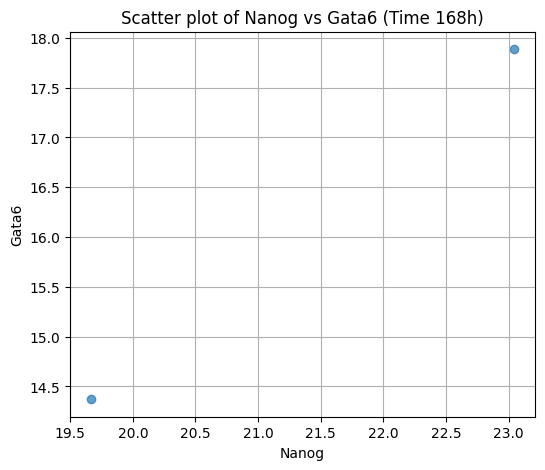

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  genes
gene_x = 'Nanog'
gene_y = 'Gata6'

df_t168 = df[df["Time"] == 168][[gene_x, gene_y]].replace(0, np.nan)

plt.figure(figsize=(6,5))
plt.scatter(df_t168[gene_x], df_t168[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time 168h)")
plt.grid(True)
plt.show()




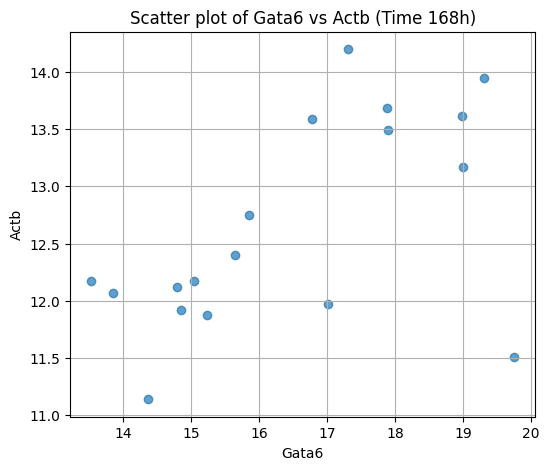

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# genes
gene_x = 'Gata6'
gene_y = 'Actb'
df_t168 = df[df["Time"] == 168][[gene_x, gene_y]].replace(0, np.nan)

plt.figure(figsize=(6,5))
plt.scatter(df_t168[gene_x], df_t168[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time 168h)")
plt.grid(True)
plt.show()




/var/folders/69/2cc632vs6ss5k6xfk3cps1kw0000gn/T/ipykernel_32583/2163168938.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_t0[df["Time"] == 0]


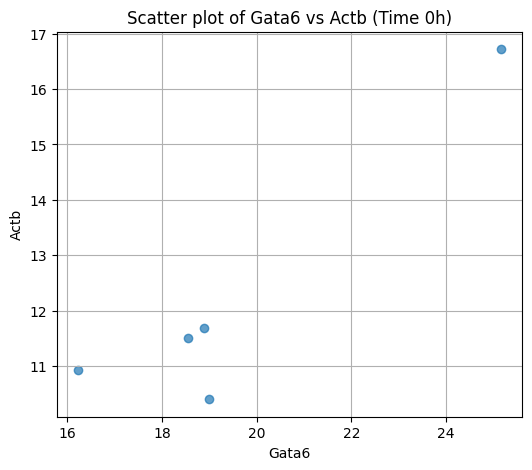

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_plot = df_t0[df["Time"] == 0]

plt.figure(figsize=(6,5))
plt.scatter(df_t0[gene_x], df_t0[gene_y], alpha=0.7)
plt.xlabel(gene_x)
plt.ylabel(gene_y)
plt.title(f"Scatter plot of {gene_x} vs {gene_y} (Time 0h)")
plt.grid(True)
plt.show()




### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identified different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

/Users/michaellima/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['MBP' 'Smarca4' 'Unnamed: 99']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


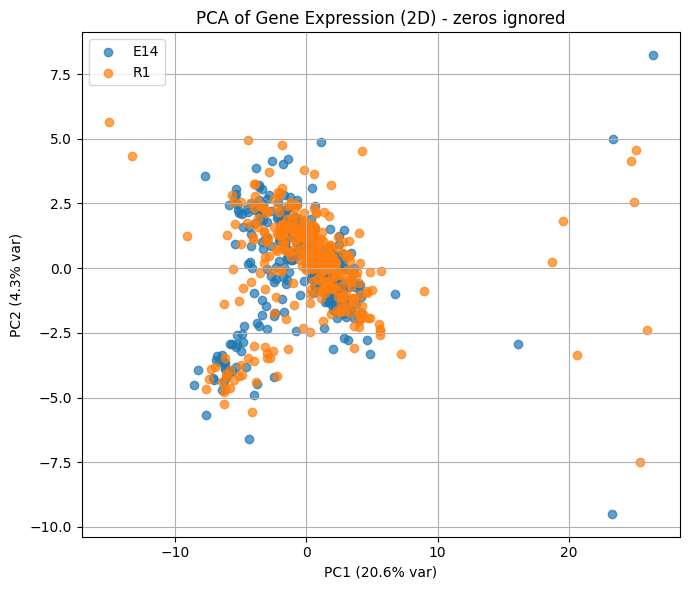

Explained variance ratio: [0.20574286 0.04345465]
Total variance explained: 0.2491975113422559


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np


df = pd.read_csv("gene_expression_data.csv")
X = df.drop(columns=["Time", "Type", "Sample"], errors="ignore").replace(0, np.nan) # ignore 0s
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Type": df["Type"],
    "Time": df["Time"]
})


# plot

plt.figure(figsize=(7, 6))

for t in pca_df["Type"].unique():
    subset = pca_df[pca_df["Type"] == t]
    plt.scatter(subset["PC1"], subset["PC2"], label=t, alpha=0.7)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of Gene Expression (2D) - zeros ignored")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

/Users/michaellima/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['MBP' 'Smarca4' 'Unnamed: 99']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


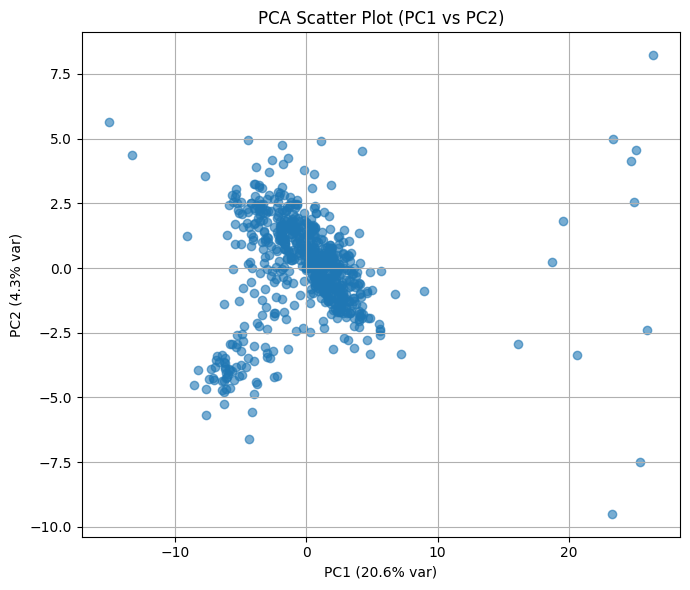

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv("gene_expression_data.csv")
X = df.drop(columns=["Time", "Type", "Sample"], errors="ignore").replace(0, np.nan)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.6)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.grid(True)

plt.tight_layout()
plt.show()


/Users/michaellima/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['MBP' 'Smarca4' 'Unnamed: 99']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


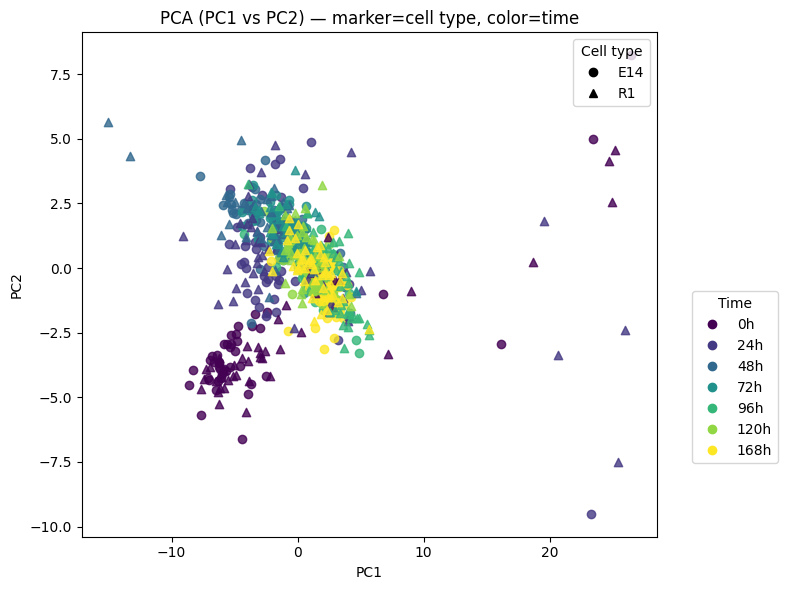

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv("gene_expression_data.csv")
X = df.drop(columns=["Time", "Type", "Sample"], errors="ignore").replace(0, np.nan)
X = SimpleImputer(strategy="mean").fit_transform(X)
X = StandardScaler().fit_transform(X)

pcs = PCA(n_components=2).fit_transform(X)

plot_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "Time": df["Time"],
    "Type": df["Type"]
})

markers = {"E14": "o", "R1": "^"}
times = sorted(plot_df["Time"].unique())
cmap = plt.cm.viridis
colors = {t: cmap(i/(len(times)-1)) for i, t in enumerate(times)}

plt.figure(figsize=(8, 6))

for cell_type in plot_df["Type"].unique():
    for t in times:
        subset = plot_df[(plot_df["Type"] == cell_type) & (plot_df["Time"] == t)]
        plt.scatter(
            subset["PC1"],
            subset["PC2"],
            marker=markers[cell_type],
            color=colors[t],
            alpha=0.8,
            label=f"{cell_type}-{t}h"
        )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) — marker=cell type, color=time")

# cleaner legends
from matplotlib.lines import Line2D
type_legend = [
    Line2D([0], [0], marker=markers[t], color='black', linestyle='', label=t)
    for t in markers
]
time_legend = [
    Line2D([0], [0], marker='o', color=colors[t], linestyle='', label=f"{t}h")
    for t in times
]

leg1 = plt.legend(handles=type_legend, title="Cell type", loc="upper right")
plt.gca().add_artist(leg1)
plt.legend(handles=time_legend, title="Time", bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()


/Users/michaellima/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 99']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


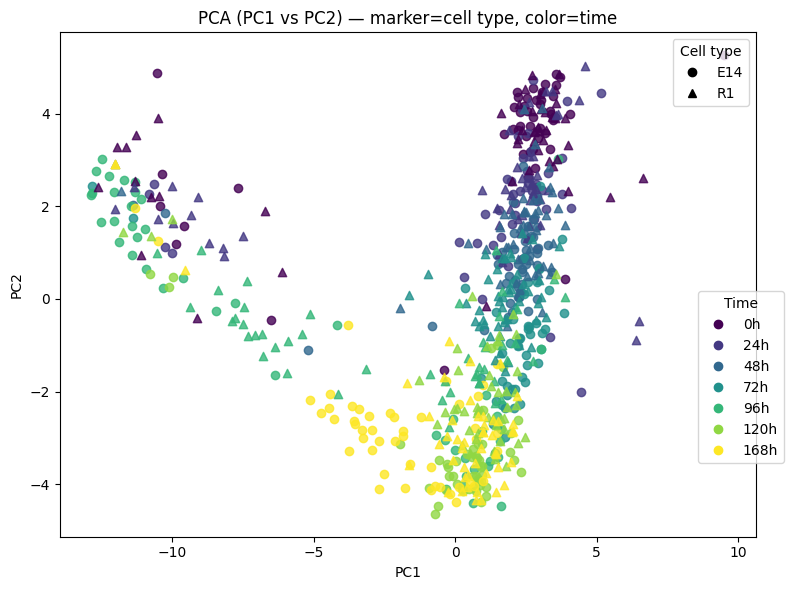

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv("gene_expression_data.csv")
X = df.drop(columns=["Time", "Type", "Sample"], errors="ignore")
X = SimpleImputer(strategy="mean").fit_transform(X)
X = StandardScaler().fit_transform(X)

pcs = PCA(n_components=2).fit_transform(X)

plot_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "Time": df["Time"],
    "Type": df["Type"]
})

markers = {"E14": "o", "R1": "^"}
times = sorted(plot_df["Time"].unique())
cmap = plt.cm.viridis
colors = {t: cmap(i/(len(times)-1)) for i, t in enumerate(times)}

plt.figure(figsize=(8, 6))

for cell_type in plot_df["Type"].unique():
    for t in times:
        subset = plot_df[(plot_df["Type"] == cell_type) & (plot_df["Time"] == t)]
        plt.scatter(
            subset["PC1"],
            subset["PC2"],
            marker=markers[cell_type],
            color=colors[t],
            alpha=0.8,
            label=f"{cell_type}-{t}h"
        )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) — marker=cell type, color=time")

# cleaner legends
from matplotlib.lines import Line2D
type_legend = [
    Line2D([0], [0], marker=markers[t], color='black', linestyle='', label=t)
    for t in markers
]
time_legend = [
    Line2D([0], [0], marker='o', color=colors[t], linestyle='', label=f"{t}h")
    for t in times
]

leg1 = plt.legend(handles=type_legend, title="Cell type", loc="upper right")
plt.gca().add_artist(leg1)
plt.legend(handles=time_legend, title="Time", bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()
